## Plotly ternary contour plot

2d point position can be  given in a cartesian, polar or  barycentric system of  coordinates.
Ternary plots work in barycentric coordinates.

Given a triangle of vertices $V_k$, $k=0, 1, 2$, indexed such that the sequence $V_0, V_1, V_2$ is run in counter-clockwise
direction, like in the figure below, then each 2D point, $P$, can be expressed as a barycentric combination of the vertices:
$$P=aV_0+bV_1+cV_2,$$ with $a+b+c=1$. The scalars $a, b, c$ are called barycentric coordinates of the point P
with respect to the given triangle.

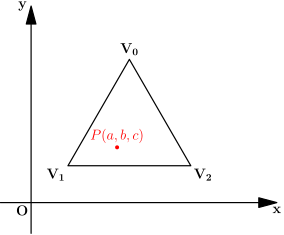

In [1]:
from IPython.display import SVG
SVG(filename='Data/triangle.svg')

All points within the triangular region, bounded by the reference triangle, have positive barycentric coordinates, i.e.
$a, b, c\geq 0$, $a+b+c=1$.

A ternary plot is a scatter plot of n points in a triangular region, represented  by their barycentric coordinates with respect to that triangle.


Ternary plot is used to represent  triplets of values of
 three dependent positive variables $A, B, C$, whose sum is a constant, $k$. Scaling each variable we get $\displaystyle\frac{1}{k}A+\displaystyle\frac{1}{k}B+\displaystyle\frac{1}{k}C=1$.
Hence n normalized triplets interpreted as values of a variable $Y=\left(\displaystyle\frac{1}{k}A, \displaystyle\frac{1}{k}B, \displaystyle\frac{1}{k}C\right)$ can be interpreted as barycentric coordinates with respect to a triangle, and can be represented by points in a   triangular region, i.e. as a scatter ternary plot. In most cases the constant $k$ is 100, and a, b, c represent the percent of parts in a composition of three elements.

The reference triangle in a ternary plot is, by convention, an equilateral triangle. 


If the triangle vertices, $V_k$, have the cartesian coordinates $(x_k, y_k)$, $k=0, 1, 2$, and a point $P$ has the barycentric coordinates $(a, b, c)$, then its cartesian coordinates, $P(x,y)$, are derived  from this relation:
    $$\left[\begin{array}{c} x\\y\\1\end{array}\right ]= \left(\begin{array}{ccc}x_0&x_1&x_2\\y_0&y_1&y_2\\1&1&1\end{array}\right)\left[\begin{array}{c} a\\b\\c\end{array}\right ]$$



A ternary contour plot is the contour plot of a function $z=f(a, b, c)$, $a, b, c \geq 0$, $a+b+c=1$, 
i.e. a function of positive barycentric coordinates.

Plotly provides a `scatterternary` trace, but a  ternary contour trace that maps z-values to a continuous colorscale is not introduced yet.

Task:

*Given n points of  barycentric coordinates, (a, b, c), with respect to an equilateral triangle of vertices $V_k(x_k, y_k)$, $k=0, 1, 2$,  and n values
in a list or array, z, extract data for a Plotly ternary contour plot or heatmap*. 

Since these Plotly traces work only in cartesian coordinates
we proceed as follows:

- compute the cartesian coordinates, (x, y), of the  given points from their barycentric coordinates, via the above tranformation;

- define a meshgrid on the rectangle $[min(x), max(x)] \times [min(y), max(y)]$;

- interpolate  data  (x, y; z) and evaluate the interpolatory function at the meshgrid points to get an array, `grid_z`;

- compute the   barycentric coordinates of the meshgrid points, and associate a `nan` value to `grid_z` where at least one of these barycentric coordinates is negative (i.e. insert `nan` in the position of points that are outside the reference triangle).

- define a contour type trace from  `grid_z`

In [2]:
import platform
import plotly
print(f'Python version: {platform.python_version()}')
print(f'Plotly version: {plotly.__version__}')

Python version: 3.6.4
Plotly version: 3.4.0


In [3]:
import plotly.graph_objs as go
import numpy as np
from scipy.interpolate import griddata

Define  data for a ternary contour plot:

In [4]:
A = np.array([0, .3 ,.25, .34 ,0, .4 ,.65, 0.05,  0,  1, .47, .2, .7])  #pos 10 1, 0, 0
B = np.array([1, .1, .45, .56, 0, .5, .3,  0.75, .85, 0,  .33, .3, .13])
C = np.array([0, .6 ,.3,  .1,  1, .1, .05,  .2,  .15, 0,  .2,  .5, .17])

z=np.array([1.27036107, 1.27893858, 0.52255697, 1.50035059, 0.84853798,
       1.27722501, 1.20920733, 0.88965008, 0.59293362, 0.9223051 ,
       1.57173859, 1.33606612, 1.08977333])
A+B+C

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Note** that to get a full triangle contour plot the initial data must contain the vertex points and values z at these points.
Otherwise the contour plot will be generated in a subregion of the triangular one!!!!

To get acquainted with Plotly ternary axes we first plot the points $(a_j, b_j, c_j)$, with  $a_j \in A, b_j\in B, c_j\in C$, $j\in\{0, 1, \ldots, 12\}$:

In [5]:
pl_ternary=dict(type='scatterternary',
                a=A,
                b=B, 
                c=C,
                mode='markers',
                marker=dict(size=10, color='red'))

layout=dict(width=500, height=400,
            ternary= {'sum':1,
                      'aaxis':{'title': 'a',  'min': 0.001, 'linewidth':0.5, 'ticks':'outside' },
                      'baxis':{'title': 'b',  'min': 0.001, 'linewidth':0.5, 'ticks':'outside' },
                      'caxis':{'title': 'c',  'min': 0.001, 'linewidth':0.5, 'ticks':'outside' }},
            showlegend= False,
            paper_bgcolor='#EBF0F8')

fw=go.FigureWidget(data=[pl_ternary], layout=layout)
fw #this plot is visible only when the notebook is run

FigureWidget({
    'data': [{'a': array([0.  , 0.3 , 0.25, 0.34, 0.  , 0.4 , 0.65, 0.05, 0.  , 1.  , 0.47, 0.2…

The triangle sides opposite to the vertices marked by a, b, respectively c,  are the lines of 0 barycentric coordinate: a=0, b=0, respectively c=0.
Each parallel to such a side has a constant a, b, respectively c coordinate. Notice that the ticks are drawn correspondingly.  

### Functions that define elements for plotting a ternary contour plot

In [6]:
def tr_b2c2b():
    # returns the transformation matrix from barycentric to cartesian coordinates and conversely
    tri_verts = np.array([[0.5, np.sqrt(3)/2], [0, 0], [1, 0]])# reference triangle
    M = np.array([tri_verts[:,0], tri_verts[:, 1], np.ones(3)]) 
    return M, np.linalg.inv(M)   

In [7]:
def contour_trace(x, y, z, tooltip, 
                  colorscale='Viridis', reversescale=False,
                  linewidth=0.5, linecolor='rgb(150,150,150)'):
                  
    return  dict(type='contour',
                 x=x,
                 y=y,    
                 z=z,
                 text=tooltip,
                 hoverinfo='text',    
                 colorscale=colorscale,
                 reversescale=reversescale,
                 line=dict(width=linewidth, color=linecolor),
                 colorbar=dict(thickness=20, ticklen=4))

As outlined above, our ternary contour is plotted in cartesian coordinates, hence we cannot use the Plotly ternary 
layout defined for  `scatterternary` trace.
We have to define the tick positions and directions in a cartesian system.

The next two functions return the barycentric coordinates of tick starting points, respectively the lists of x, and y-coordinates of points that defines the ticks, as well as the position of ticklabels:

In [8]:
def barycentric_ticks(side):
    # side 0, 1 or  2; side j has 0 in the  j^th position of barycentric coords of tick origin
    # returns the list of tick origin barycentric coords
    p = 10
    if side == 0: #where a=0
        return np.array([(0, j/p, 1-j/p) for j in range(p-2, 0, -2)])
    elif side == 1: # b=0
        return np.array([(i/p, 0, 1-i/p)  for i in  range( 2, p, 2) ])
    elif side == 2: #c=0
        return np.array([(i/p, j/p, 0)  for i in range(p-2, 0, -2) for j in range(p-i, -1, -1)  if i+j==p])
    else:
        raise ValueError('The side can be only 0, 1, 2')



def cart_coord_ticks(side, t=0.01):
    # side 0, 1 or 2
    # each tick segment is parameterized as (x(s), y(s)), s in [0, t]
    global  M, xt, yt, posx, posy
    # M is the transformation matrix from barycentric to cartesian coords
    # xt, yt are the lists of x, resp y-coords of tick segments
    # posx, posy are the lists of ticklabel positions for side 0, 1, 2 (concatenated)
    
    baryc = barycentric_ticks(side)
    xy1 = np.dot(M, baryc.T)
    xs, ys = xy1[:2] 
    
    if side == 0:
        for i in range(4):
            xt.extend([xs[i], xs[i]+t, None])
            yt.extend([ys[i], ys[i]-np.sqrt(3)*t, None])
        posx.extend([xs[i]+t for i in range(4)])
        posy.extend([ys[i]-np.sqrt(3)*t for i in range(4)])
        
    elif  side == 1:
        for i in range(4):
            xt.extend([xs[i], xs[i]+t, None])
            yt.extend([ys[i], ys[i]+np.sqrt(3)*t, None])
        posx.extend([xs[i]+t for i in range(4)]) 
        posy.extend([ys[i]+np.sqrt(3)*t for i in range(4)])
        
    elif side == 2:
        for i in range(4):
            xt.extend([xs[i], xs[i]-2*t, None])
            yt.extend([ys[i], ys[i], None])
        posx.extend([xs[i]-2*t for i in range(4)])
        posy.extend([ys[i] for i in range(4)]) 
    else:
        raise ValueError('side can be only 0,1,2')

Layout definition:

In [9]:
def ternary_layout(title='Ternary contour plot', width=550, height=525, 
                   fontfamily= 'Balto, sans-serif' , lfontsize=14,
                   plot_bgcolor='rgb(240,240,240)',
                   vertex_text=['a', 'b', 'c'], v_fontsize=14):

     return dict(title=title,
                 font=dict(family=fontfamily, size=lfontsize),
                 width=width, height=height,
                 xaxis=dict(visible=False),
                 yaxis=dict(visible=False),
                 plot_bgcolor=plot_bgcolor,
                 showlegend=False,
                 #annotations for strings  placed at the triangle vertices
                 annotations=[dict(showarrow=False,
                                   text=vertex_text[0],
                                   x=0.5,
                                   y=np.sqrt(3)/2,
                                   align='center',
                                   xanchor='center',
                                   yanchor='bottom',
                                   font=dict(size=v_fontsize)),
                              dict(showarrow=False,
                                   text=vertex_text[1],
                                   x=0,
                                   y=0,
                                   align='left',
                                   xanchor='right',
                                   yanchor='top',
                                   font=dict(size=v_fontsize)),
                              dict(showarrow=False,
                                   text=vertex_text[2],
                                   x=1,
                                   y=0,
                                   align='right',
                                   xanchor='left',
                                   yanchor='top',
                                   font=dict(size=v_fontsize))
                              ])



In [10]:
def set_ticklabels(annotations, posx, posy, proportion=True):
    #annotations: list of annotations previously defined in layout definition as a dict,
    #     not as an instance of go.Layout
    #posx, posy:  lists containing ticklabel position coordinates
    #proportion - boolean; True when ticklabels are 0.2, 0.4, ... False when they are 20%, 40%...
    
    if not isinstance(annotations, list):
        raise ValueError('annotations should be a list')
        
    ticklabel = [0.8, 0.6, 0.4, 0.2] if proportion else ['80%', '60%', '40%', '20%'] 
    
    annotations.extend([dict(showarrow=False, # annotations for ticklabels on side 0
                             text=f'{ticklabel[j]}',
                             x=posx[j],
                             y=posy[j],
                             align='center',
                             xanchor='center', 
                             yanchor='top',
                             font=dict(size=12)) for j in range(4)])
    
    annotations.extend([dict(showarrow=False, # annotations for ticklabels on  side 1
                             text=f'{ticklabel[j]}',
                             x=posx[j+4],
                             y=posy[j+4],
                             align='center',
                             xanchor='left', 
                             yanchor='middle',
                             font=dict(size=12)) for j in range(4)])

    annotations.extend([dict(showarrow=False, # annotations for ticklabels on side 2
                             text=f'{ticklabel[j]}',
                             x=posx[j+8],
                             y=posy[j+8],
                             align='center',
                             xanchor='right', 
                             yanchor='middle',
                             font=dict(size=12)) for j in range(4)])
    return annotations

In [11]:
def styling_traces():
    global xt, yt
    side_trace = dict(type='scatter',
                      x=[0.5, 0, 1, 0.5],
                      y=[np.sqrt(3)/2, 0, 0, np.sqrt(3)/2],
                      mode='lines',
                      line=dict(width=2, color='#444444'),
                      hoverinfo='none')
    
    tick_trace = dict(type='scatter',
                      x=xt,
                      y=yt,
                      mode='lines',
                      line=dict(width=1, color='#444444'),
                      hoverinfo='none')
    
    return side_trace, tick_trace

### Extract and process data for a ternary contour plot

In [12]:
M, invM =  tr_b2c2b()

Convert the barycentric coordinates of  data points, (a, b, c), to cartesian coordinates:

In [13]:
cartes_coord_points = np.einsum('ik, kj -> ij', M, np.stack((A, B, C)))
xx, yy = cartes_coord_points[:2]

In [14]:
a, b = xx.min(), xx.max()
c, d = yy.min(), yy.max()

Define a meshgrid on the rectangle [a,b] x [c,d]:

In [15]:
N=150
gr_x = np.linspace(a,b, N)
gr_y = np.linspace(c,d, N)
grid_x, grid_y = np.meshgrid(gr_x, gr_y)

#interpolate data (cartes_coords[:2].T; z)  and evaluate the  interpolatory function at the meshgrid points to get grid_z
grid_z = griddata(cartes_coord_points[:2].T, z, (grid_x, grid_y), method='cubic')

Compute the barycentric coordinates of  meshgrid points:

In [16]:
bar_coords = np.einsum('ik, kmn -> imn', invM, np.stack((grid_x, grid_y, np.ones(grid_x.shape))))
bar_coords[np.where(bar_coords<0)] = None # invalidate the points outside of the reference triangle
xy1 = np.einsum('ik, kmn -> imn', M, bar_coords) # recompute back the cartesian coordinates of bar_coords with invalid positions
                                               # and extract indices where x are nan

I = np.where(np.isnan(xy1[0]))
grid_z[I] = None

Define the hover text for proportions and percents, i.e. when a hovered point displays a, b, c in [0,1], respectively in [0,100]:

In [17]:
# tooltips for  proportions, i.e. a+b+c=1

t_proportions = [[f'a: {round(bar_coords[0][i,j], 2)}<br>b: {round(bar_coords[1][i,j], 2)}'+\
                  f'<br>c: {round(1-round(bar_coords[0][i,j], 2)-round(bar_coords[1][i,j], 2), 2)}'+\
                  f'<br>z: {round(grid_z[i,j],2)}'  if ~np.isnan(xy1[0][i,j]) else '' for j in range(N)]
                                       for i in range(N)] 

# tooltips for  percents, i.e. a+b+c=100
t_percents=[[f'a: {int(100*bar_coords[0][i,j]+0.5)}<br>b: {int(100*bar_coords[1][i,j]+0.5)}'+\
             f'<br>c: {100-int(100*bar_coords[0][i,j]+0.5)-int(100*bar_coords[1][i,j]+0.5)}'+\
             f'<br>z: {round(grid_z[i,j],2)}'  if ~np.isnan(xy1[0][i,j]) else '' for j in range(N)] 
                                         for i in range(N)] 

Colorscale for contour:

In [18]:
pl_deep = [[0.0, 'rgb(253, 253, 204)'],
           [0.1, 'rgb(201, 235, 177)'],
           [0.2, 'rgb(145, 216, 163)'],
           [0.3, 'rgb(102, 194, 163)'],
           [0.4, 'rgb(81, 168, 162)'],
           [0.5, 'rgb(72, 141, 157)'],
           [0.6, 'rgb(64, 117, 152)'],
           [0.7, 'rgb(61, 90, 146)'],
           [0.8, 'rgb(65, 64, 123)'],
           [0.9, 'rgb(55, 44, 80)'],
           [1.0, 'rgb(39, 26, 44)']]

### Ternary contour plot that displays proportions

In [19]:
xt = []
yt = []
posx = []
posy = []
for side in [0, 1, 2]:
    cart_coord_ticks(side, t=0.01)


tooltip = t_proportions
layout = ternary_layout()
annotations = set_ticklabels(layout['annotations'], posx, posy, proportion=True)

c_trace = contour_trace(gr_x, gr_y, grid_z, tooltip, colorscale=pl_deep, reversescale=True)
side_trace, tick_trace =styling_traces()
fw1 = go.FigureWidget(data=[c_trace,  tick_trace, side_trace], layout=layout)
fw1.layout.annotations=annotations
    
#fw1

In [21]:
import plotly.plotly as py
py.sign_in('empet', 'api_key')
py.iplot(fw1, filename='ternary1_cont')

### Ternary contour plot that displays percents

**Note**: When we associate the ternary contour plot to variables, A, B, C, with A+B+C=100, we have to scale each one by 
    $1./100$,  because the code  works with barycentric coordinates. In this case however we can pass the tooltips corresponding to percents and plot the percents as ticklabels:

In [22]:
xt = []
yt = []
posx = []
posy = []
for side in [0, 1, 2]:
    cart_coord_ticks(side, t=0.01)# set xt, yt posx, posy for this side


tooltip = t_percents
layout = ternary_layout(title='Ternary contour plot that displays percents')
annotations = set_ticklabels(layout['annotations'], posx, posy, proportion=False)

c_trace = contour_trace(gr_x, gr_y, grid_z, tooltip, colorscale=pl_deep, reversescale=True)
side_trace, tick_trace = styling_traces()
fw2 = go.FigureWidget(data=[c_trace,  tick_trace, side_trace], layout=layout)
fw2.layout.annotations=annotations
#fw2    

In [23]:
import plotly.plotly as py
py.iplot(fw2, filename='ternary2_cont')